In [1]:
%display typeset

In [2]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import math

Equações do SIR:

$$
\dfrac{dS_H}{dt} = -ab_2\bigg(\dfrac{I_M}{N}\bigg)S_H\\
\\
\dfrac{dI_H}{dt} = ab_2\bigg(\dfrac{I_M(t-\tau_H)}{N}\bigg)S_H(t-\tau_H)-\gamma I_H\\
\\
\dfrac{dR_H}{dt} = \gamma I_H
$$

In [3]:
from sage.calculus.desolvers import desolve_system_rk4

In [4]:
N = 1000  # população total
I_M0 = 1  # número inicial de mosquitos infectados
S_H0 = N - I_M0  # número inicial de pessoas suscetíveis
I_H0 = 0  # número inicial de pessoas infectadas
R_H0 = 0  # número inicial de pessoas recuperadas

a = 0.1  # taxa de mordida
b_2 = 0.2  # probabilidade de transmissão de mosquitos para humanos
gamma = 0.1  # taxa de recuperação
tau_H = 10  # atraso de tempo em dias

In [5]:
dt = 0.1
num_steps = 1000

S_H = [S_H0]
I_H = [I_H0]
R_H = [R_H0]

In [6]:
for t in range(1, num_steps):
    if t < tau_H:
        dS_H = -a * b_2 * (I_M0 / N) * S_H[-1]
        dI_H = a * b_2 * (I_M0 / N) * S_H[-1] - gamma * I_H[-1]
    else:
        dS_H = -a * b_2 * (I_H[t - tau_H] / N) * S_H[t - tau_H]
        dI_H = a * b_2 * (I_H[t - tau_H] / N) * S_H[t - tau_H] - gamma * I_H[-1]
    dR_H = gamma * I_H[-1]

    S_H.append(S_H[-1] + dt * dS_H)
    I_H.append(I_H[-1] + dt * dI_H)
    R_H.append(R_H[-1] + dt * dR_H)

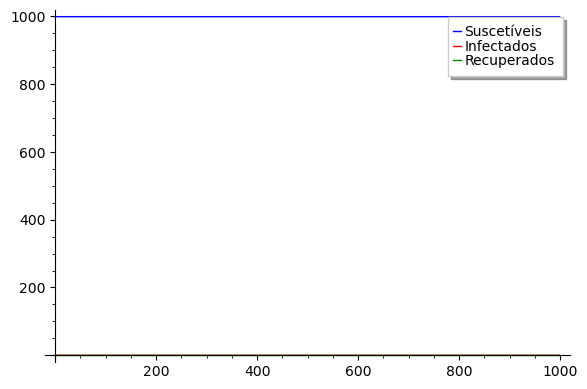

In [7]:
p = line(zip(range(num_steps), S_H), color='blue', legend_label='Suscetíveis')
p += line(zip(range(num_steps), I_H), color='red', legend_label='Infectados')
p += line(zip(range(num_steps), R_H), color='green', legend_label='Recuperados')
p.show()

In [8]:
# parâmetros do problema
T1 = 23.2  # Mean temperature in the absence of seasonality (˚C)
T2 = 0.07  # Amplitude of seasonal variability in temperature
omega1 = 0.67  # Angular frequency of seasonal oscillations in temperature (months–1)
phi1 = 1.53  # Phase lag of temperature variability
R1 = 85.9  # Mean monthly rainfall in the absence of seasonality (mm)
R2 = 0.98  # Amplitude of seasonal variability in rainfall
omega2 = 0.65  # Angular frequency of seasonal oscillations in rainfall (months–1)
phi2 = 1.99  # Phase lag of rainfall variability

# inicialização
b_2 = 0.09
N = 1000  # população total
I_M0 = 1  # número inicial de mosquitos infectados
S_H0 = N - I_M0  # número inicial de pessoas suscetíveis
I_H0 = 0  # número inicial de pessoas infectadas
R_H0 = 0  # número inicial de pessoas recuperadas
gamma = 1/120  # taxa de recuperação
D1 = 36.5
tau_H = 10  # atraso de tempo em dias
B_E = 200
p_E = 0.9
p_L = 0.25
p_p = 0.75

# Implementação do modelo
dt = 0.1  # passo de tempo
num_steps = 1000  # número de passos

S_H = [S_H0]
I_H = [I_H0]
R_H = [R_H0]

# funções de temperatura e chuva
def T(t):
    return T1 * (1 + T2 * np.cos(omega1 * t - phi1))

def R(t):
    return R1 * (1 + R2 * np.cos(omega2 * t - phi2))

for t in range(1, num_steps):
    # Atualize a temperatura e a chuva
    T_curr = T(t * dt)
    R_curr = R(t * dt)

    # Calcular a taxa de mordida e probabilidade de transmissão
    a = (T_curr - T1) / D1
    b = B_E * p_E(R_curr) * p_L(R_curr, T_curr) * p_p(R_curr) / (tau_E + tau_L(T_curr) + tau_p)

    if t < tau_H:
        dS_H = -a * b_2 * (I_M0 / N) * S_H[-1]
        dI_H = a * b_2 * (I_M0 / N) * S_H[-1] - gamma * I_H[-1]
    else:
        dS_H = -a * b_2 * (I_H[t - tau_H] / N) * S_H[t - tau_H]
        dI_H = a * b_2 * (I_H[t - tau_H] / N) * S_H[t - tau_H] - gamma * I_H[-1]
    dR_H = gamma * I_H[-1]

    S_H.append(S_H[-1] + dt * dS_H)
    I_H.append(I_H[-1] + dt * dI_H)
    R_H.append(R_H[-1] + dt * dR_H)

# Plotar os resultados
plt.figure(figsize=(10, 5))
plt.plot(np.arange(num_steps) * dt, S_H, label="Suscetíveis")
plt.plot(np.arange(num_steps) * dt, I_H, label="Infectados")
plt.plot(np.arange(num_steps) * dt, R_H, label="Recuperados")
plt.legend()
plt.xlabel('Tempo (dias)')
plt.ylabel('População')
plt.show()

TypeError: 'sage.rings.real_mpfr.RealLiteral' object is not callable

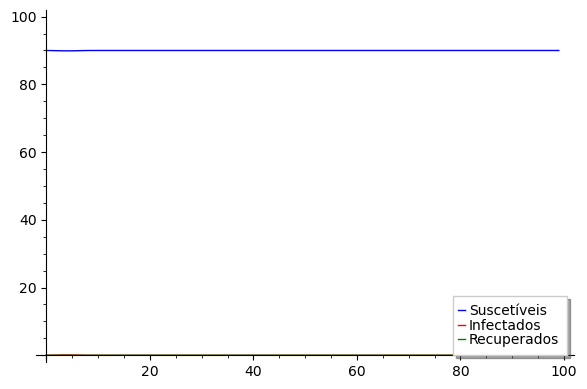

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from math import exp

# parâmetros do problema
T1 = 23.2  # Mean temperature in the absence of seasonality (˚C)
T2 = 0.07  # Amplitude of seasonal variability in temperature
omega1 = 0.67  # Angular frequency of seasonal oscillations in temperature (months–1)
phi1 = 1.53  # Phase lag of temperature variability
R1 = 85.9  # Mean monthly rainfall in the absence of seasonality (mm)
R2 = 0.98  # Amplitude of seasonal variability in rainfall
omega2 = 0.65  # Angular frequency of seasonal oscillations in rainfall (months–1)
phi2 = 1.99  # Phase lag of rainfall variability

# Define the parameters and functions
B_E = 200
p_E = 0.9
p_L = 0.25
p_P = 0.75
tau_E = 1  # days
D1 = 36.5  # ˚C days
b2 = 0.09
tau_H = 10  # days
gamma = 1/120  # days^-1

# inicialização
N = 100  # população total
I_M0 = 10  # número inicial de mosquitos infectados
I_H0 = 10  # número inicial de pessoas infectadas
S_H0 = N - I_H0  # número inicial de pessoas suscetíveis
I_H0 = 0  # número inicial de pessoas infectadas
R_H0 = 0  # número inicial de pessoas recuperadas

# Implementação do modelo
dt = 1.0  # passo de tempo
num_steps = 100  # número de passos

S_H = [S_H0]
I_H = [I_H0]
R_H = [R_H0]

# funções de temperatura e chuva
def T(t):
    return T1 * (1 + T2 * np.cos(omega1 * t - phi1))

def R(t):
    return R1 * (1 + R2 * np.cos(omega2 * t - phi2))

for t in range(1, num_steps):
    # Atualize a temperatura e a chuva
    T_curr = T(t * dt)
    R_curr = R(t * dt)

    # Calcular a taxa de mordida e probabilidade de transmissão
    a = (T_curr - T1) / D1
    b = B_E * p_E * p_L * p_P / tau_E

    if t < tau_H:
        dS_H = -a * b2 * (I_M0 / N) * S_H[-1]
        dI_H = a * b2 * (I_M0 / N) * S_H[-1] - gamma * I_H[-1]
    else:
        dS_H = -a * b2 * (I_H[t - tau_H] / N) * S_H[t - tau_H]
        dI_H = a * b2 * (I_H[t - tau_H] / N) * S_H[t - tau_H] - gamma * I_H[-1]
    dR_H = gamma * I_H[-1]

    # Atualize as populações
    S_H.append(S_H[-1] + dS_H * dt)
    I_H.append(I_H[-1] + dI_H * dt)
    R_H.append(R_H[-1] + dR_H * dt)

# # Plotar os resultados
# plt.figure(figsize=(10, 5))
# plt.plot(np.arange(num_steps) * dt, S_H, label="Suscetíveis")
# plt.plot(np.arange(num_steps) * dt, I_H, label="Infectados")
# plt.plot(np.arange(num_steps) * dt, R_H, label="Recuperados")
# plt.legend()
# plt.xlabel('Tempo (dias)')
# plt.ylabel('População')
# plt.show()

times = [i*dt for i in range(num_steps)]

# Criar os gráficos
p1 = line(zip(times, S_H), color='blue', legend_label='Suscetíveis')
p2 = line(zip(times, I_H), color='red', legend_label='Infectados')
p3 = line(zip(times, R_H), color='green', legend_label='Recuperados')

# Combinar os gráficos e mostrar o resultado
(p1 + p2 + p3).show(xmin=0, xmax=num_steps*dt, ymin=0, ymax=N)

In [12]:
# Parâmetros adicionais necessários
mu = 0.02  # Taxa de mortalidade do mosquito
ab1 = 0.2  # Proporção de picadas de mosquito em humanos suscetíveis que resultam em infecção

# Definir função de sobrevivência do mosquito
def l(tau_M):
    return e^(-mu * tau_M)

# Calcular R_0
R_0 = (M * a^2 * b1 * b2 * l(tau_M)) / (gamma * mu * N)

print(f"R_0: {R_0}")

# Verificar se R_0 > 1, se não, ajustar parâmetros
if R_0 <= 1:
    print("Ajustando parâmetros para garantir R_0 > 1...")
    # Aqui, vamos aumentar a proporção de mordidas que resultam em infecção para garantir R_0 > 1
    # Isto é apenas um exemplo, pode ser necessário ajustar outros parâmetros dependendo do contexto do modelo
    ab1 = ab1 * 2  # dobrar ab1
    # Recalcular R_0
    R_0 = (M * a^2 * b1 * b2 * l(tau_M)) / (gamma * mu * N)

print(f"R_0 ajustado: {R_0}")

NameError: name 'M' is not defined

Testando com 1% dos mosquitos infectados:

R_0: 0.07260486278761327
Prevalência de equilíbrio para mosquitos: 2327.336900395572
Prevalência de equilíbrio para humanos: 121637.07027108716


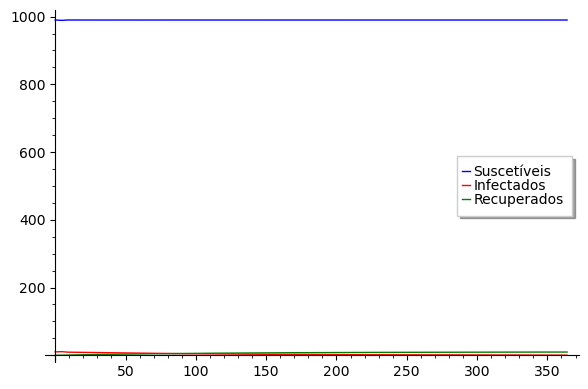

In [13]:
from math import cos, pi
from matplotlib import pyplot as plt
import numpy as np

# Definindo as constantes
num_steps = 365 # tempo total
dt = 1 # tamanho do passo

T1 = 23.2  # Temperatura média na ausência de sazonalidade (˚C)
T2 = 0.07  # Amplitude da variabilidade sazonal na temperatura
omega1 = 0.67  # Frequência angular das oscilações sazonais na temperatura (meses^–1)
phi1 = 1.53  # "Phase lag" da variabilidade da temperatura (defasagem de fase)
R1 = 85.9  # Precipitação mensal média na ausência de sazonalidade (mm)
R2 = 0.98  # Amplitude da variabilidade sazonal na precipitação
omega2 = 0.65  # Frequência angular das oscilações sazonais na precipitação (meses^–1)
phi2 = 1.99  # "Phase lag" da variabilidade da precipitação (defasagem de fase)



B_E = 200 # número de ovos coolocadas por adulto por oviposição
p_E = 0.9 # probabilidade de sobrevivência dos ovos
p_L = 0.25 # probabilidade de sobrevivência das larvas
p_P = 0.75 # probabilidade de sobrevivência dos pupas
tau_E = 1 # duração da fase de desenvolvimento dos ovos
tau_P = 1  # duração da fase de desenvolvimento das pupas
c1 = 0.00554
c2 = -0.06737

D1 = 36.5
b1 = 0.04
A = -0.03
B = 1.31
C = -4.4
b2 = 0.09
tau_H = 10
DD = 111
Tmin = 16
gamma = 1/120

#tau_L = 2  # Valor arbitrário, por favor substitua com o valor ou função apropriado

mu = 0.02  # taxa de mortalidade de mosquitos
ab1 = 0.2  # proporção de mordidas de mosquitos em humanos suscetíveis que resultam em infecção
N = 1000  # número total de humanos
M = 10000  # número total de mosquitos
I_M0 = M/100  # número inicial de mosquitos infectados
I_H0 = 10  # número inicial de humanos infectados
S_H0 = N - I_H0  # número inicial de pessoas suscetíveis

# Definindo as listas
S_H = [S_H0]
I_H = [I_H0]
R_H = [0]
times = [0]

# Funções de temperatura e chuva
def T(t):
    return T1 * (1 + T2 * cos(omega1 * t - phi1))

def R(t):
    return R1 * (1 + R2 * cos(omega2 * t - phi2))

def tau_L(T):
    return 1 / (c1 * T + c2)

def p(T):
    return np.exp(-1 / (A*T**2 + B*T + C))

def tau_M(T):
    return DD / (T - Tmin)

# Definindo a função de sobrevivência do mosquito
def l(tau_M, T):  
    p_T = p(T)
    return p_T**tau_M

# Simulando as equações diferenciais
for t in range(1, num_steps):
    # Atualize a temperatura e a chuva
    T_curr = T(t * dt)
    R_curr = R(t * dt)

    # Calcular a taxa de mordida e probabilidade de transmissão
    a = (T_curr - T1) / D1
    b = B_E * p_E * p_L * p_P / (tau_E + tau_L(T_curr) + tau_P)

    if t < tau_H:
        dS_H = -a * b2 * (I_M0 / N) * S_H[-1]
        dI_H = a * b2 * (I_M0 / N) * S_H[-1] - gamma * I_H[-1]
    else:
        dS_H = -a * b2 * (I_H[t - tau_H] / N) * S_H[t - tau_H]
        dI_H = a * b2 * (I_H[t - tau_H] / N) * S_H[t - tau_H] - gamma * I_H[-1]
    dR_H = gamma * I_H[-1]

    # Atualize as populações
    S_H.append(S_H[-1] + dt * dS_H)
    I_H.append(I_H[-1] + dt * dI_H)
    R_H.append(R_H[-1] + dt * dR_H)
    times.append(t * dt)

# Calculando R_0
#R_0 = (M * a**2 * ab1 * b2 * l(DD / (T1 - Tmin))) / (gamma * mu * N)
#print(f"R_0: {R_0}")

def calculate_R0(M, a, b1, b2, T, gamma, mu, N):
    tau_M_T = tau_M(T)
    l_tau_M = l(tau_M_T, T)  # Lembre-se de passar T para a função l
    R_0 = (M * a**2 * b1 * b2 * l_tau_M) / (gamma * mu * N)
    return R_0

R_0 = calculate_R0(M, a, b1, b2, T1, gamma, mu, N)
print(f"R_0: {R_0}")

# Calcular prevalências de equilíbrio
I_M_star = M * (R_0 - 1) / ((R_0 / l(DD / (T1 - Tmin), T1)) + (a * b2 * M / (gamma * N)))
I_H_star = N * (R_0 - 1) / (R_0 + (a * b1 / mu))

print(f"Prevalência de equilíbrio para mosquitos: {I_M_star}")
print(f"Prevalência de equilíbrio para humanos: {I_H_star}")

times = [i*dt for i in range(num_steps)]

# Criar os gráficos
p1 = line(zip(times, S_H), color='blue', legend_label='Suscetíveis')
p2 = line(zip(times, I_H), color='red', legend_label='Infectados')
p3 = line(zip(times, R_H), color='green', legend_label='Recuperados')

# Combinar os gráficos e mostrar o resultado
(p1 + p2 + p3).show(xmin=0, xmax=num_steps*dt, ymin=0, ymax=N)

Testando com 50% dos mosquitos infectados:

R_0: 0.07260486278761327
Prevalência de equilíbrio para mosquitos: 2327.336900395572
Prevalência de equilíbrio para humanos: 121637.07027108716


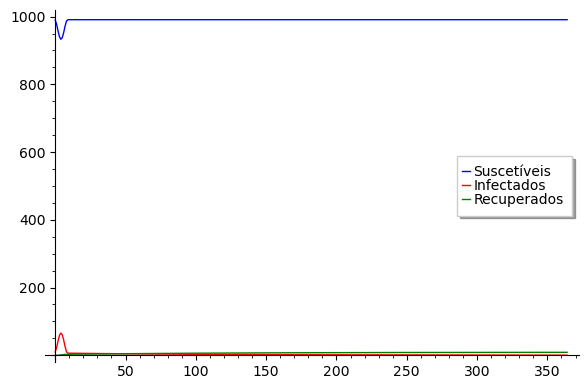

In [14]:
# Definindo as constantes
num_steps = 365 # tempo total
dt = 1 # tamanho do passo

T1 = 23.2  # Temperatura média na ausência de sazonalidade (˚C)
T2 = 0.07  # Amplitude da variabilidade sazonal na temperatura
omega1 = 0.67  # Frequência angular das oscilações sazonais na temperatura (meses^–1)
phi1 = 1.53  # "Phase lag" da variabilidade da temperatura (defasagem de fase)
R1 = 85.9  # Precipitação mensal média na ausência de sazonalidade (mm)
R2 = 0.98  # Amplitude da variabilidade sazonal na precipitação
omega2 = 0.65  # Frequência angular das oscilações sazonais na precipitação (meses^–1)
phi2 = 1.99  # "Phase lag" da variabilidade da precipitação (defasagem de fase)



B_E = 200 # número de ovos coolocadas por adulto por oviposição
p_E = 0.9 # probabilidade de sobrevivência dos ovos
p_L = 0.25 # probabilidade de sobrevivência das larvas
p_P = 0.75 # probabilidade de sobrevivência dos pupas
tau_E = 1 # duração da fase de desenvolvimento dos ovos
tau_P = 1  # duração da fase de desenvolvimento das pupas
c1 = 0.00554
c2 = -0.06737

D1 = 36.5
b1 = 0.04
A = -0.03
B = 1.31
C = -4.4
b2 = 0.09
tau_H = 10
DD = 111
Tmin = 16
gamma = 1/120

#tau_L = 2  # Valor arbitrário, por favor substitua com o valor ou função apropriado

mu = 0.02  # taxa de mortalidade de mosquitos
ab1 = 0.2  # proporção de mordidas de mosquitos em humanos suscetíveis que resultam em infecção
N = 1000  # número total de humanos
M = 10000  # número total de mosquitos
I_M0 = M/2  # número inicial de mosquitos infectados
I_H0 = 10  # número inicial de humanos infectados
S_H0 = N - I_H0  # número inicial de pessoas suscetíveis

# Definindo as listas
S_H = [S_H0]
I_H = [I_H0]
R_H = [0]
times = [0]

# Funções de temperatura e chuva
def T(t):
    return T1 * (1 + T2 * cos(omega1 * t - phi1))

def R(t):
    return R1 * (1 + R2 * cos(omega2 * t - phi2))

def tau_L(T):
    return 1 / (c1 * T + c2)

def p(T):
    return np.exp(-1 / (A*T**2 + B*T + C))

def tau_M(T):
    return DD / (T - Tmin)

# Definindo a função de sobrevivência do mosquito
def l(tau_M, T):  
    p_T = p(T)
    return p_T**tau_M

# Simulando as equações diferenciais
for t in range(1, num_steps):
    # Atualize a temperatura e a chuva
    T_curr = T(t * dt)
    R_curr = R(t * dt)

    # Calcular a taxa de mordida e probabilidade de transmissão
    a = (T_curr - T1) / D1
    b = B_E * p_E * p_L * p_P / (tau_E + tau_L(T_curr) + tau_P)

    if t < tau_H:
        dS_H = -a * b2 * (I_M0 / N) * S_H[-1]
        dI_H = a * b2 * (I_M0 / N) * S_H[-1] - gamma * I_H[-1]
    else:
        dS_H = -a * b2 * (I_H[t - tau_H] / N) * S_H[t - tau_H]
        dI_H = a * b2 * (I_H[t - tau_H] / N) * S_H[t - tau_H] - gamma * I_H[-1]
    dR_H = gamma * I_H[-1]

    # Atualize as populações
    S_H.append(S_H[-1] + dt * dS_H)
    I_H.append(I_H[-1] + dt * dI_H)
    R_H.append(R_H[-1] + dt * dR_H)
    times.append(t * dt)

# Calculando R_0
#R_0 = (M * a**2 * ab1 * b2 * l(DD / (T1 - Tmin))) / (gamma * mu * N)
#print(f"R_0: {R_0}")

def calculate_R0(M, a, b1, b2, T, gamma, mu, N):
    tau_M_T = tau_M(T)
    l_tau_M = l(tau_M_T, T)  # Lembre-se de passar T para a função l
    R_0 = (M * a**2 * b1 * b2 * l_tau_M) / (gamma * mu * N)
    return R_0

R_0 = calculate_R0(M, a, b1, b2, T1, gamma, mu, N)
print(f"R_0: {R_0}")

# Calcular prevalências de equilíbrio
I_M_star = M * (R_0 - 1) / ((R_0 / l(DD / (T1 - Tmin), T1)) + (a * b2 * M / (gamma * N)))
I_H_star = N * (R_0 - 1) / (R_0 + (a * b1 / mu))

print(f"Prevalência de equilíbrio para mosquitos: {I_M_star}")
print(f"Prevalência de equilíbrio para humanos: {I_H_star}")

times = [i*dt for i in range(num_steps)]

# Criar os gráficos
p1 = line(zip(times, S_H), color='blue', legend_label='Suscetíveis')
p2 = line(zip(times, I_H), color='red', legend_label='Infectados')
p3 = line(zip(times, R_H), color='green', legend_label='Recuperados')

# Combinar os gráficos e mostrar o resultado
(p1 + p2 + p3).show(xmin=0, xmax=num_steps*dt, ymin=0, ymax=N)

Testando com 100% dos mosquitos infectados:

R_0: 0.07260486278761327
Prevalência de equilíbrio para mosquitos: 2327.336900395572
Prevalência de equilíbrio para humanos: 121637.07027108716


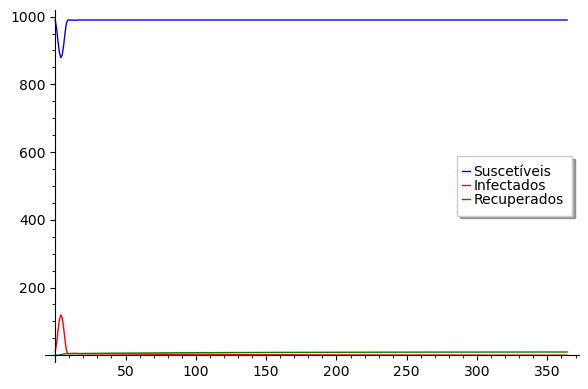

In [15]:
# Definindo as constantes
num_steps = 365 # tempo total
dt = 1 # tamanho do passo

T1 = 23.2  # Temperatura média na ausência de sazonalidade (˚C)
T2 = 0.07  # Amplitude da variabilidade sazonal na temperatura
omega1 = 0.67  # Frequência angular das oscilações sazonais na temperatura (meses^–1)
phi1 = 1.53  # "Phase lag" da variabilidade da temperatura (defasagem de fase)
R1 = 85.9  # Precipitação mensal média na ausência de sazonalidade (mm)
R2 = 0.98  # Amplitude da variabilidade sazonal na precipitação
omega2 = 0.65  # Frequência angular das oscilações sazonais na precipitação (meses^–1)
phi2 = 1.99  # "Phase lag" da variabilidade da precipitação (defasagem de fase)



B_E = 200 # número de ovos coolocadas por adulto por oviposição
p_E = 0.9 # probabilidade de sobrevivência dos ovos
p_L = 0.25 # probabilidade de sobrevivência das larvas
p_P = 0.75 # probabilidade de sobrevivência dos pupas
tau_E = 1 # duração da fase de desenvolvimento dos ovos
tau_P = 1  # duração da fase de desenvolvimento das pupas
c1 = 0.00554
c2 = -0.06737

D1 = 36.5
b1 = 0.04
A = -0.03
B = 1.31
C = -4.4
b2 = 0.09
tau_H = 10
DD = 111
Tmin = 16
gamma = 1/120

#tau_L = 2  # Valor arbitrário, por favor substitua com o valor ou função apropriado

mu = 0.02  # taxa de mortalidade de mosquitos
ab1 = 0.2  # proporção de mordidas de mosquitos em humanos suscetíveis que resultam em infecção
N = 1000  # número total de humanos
M = 10000  # número total de mosquitos
I_M0 = M  # número inicial de mosquitos infectados
I_H0 = 10  # número inicial de humanos infectados
S_H0 = N - I_H0  # número inicial de pessoas suscetíveis

# Definindo as listas
S_H = [S_H0]
I_H = [I_H0]
R_H = [0]
times = [0]

# Funções de temperatura e chuva
def T(t):
    return T1 * (1 + T2 * cos(omega1 * t - phi1))

def R(t):
    return R1 * (1 + R2 * cos(omega2 * t - phi2))

def tau_L(T):
    return 1 / (c1 * T + c2)

def p(T):
    return np.exp(-1 / (A*T**2 + B*T + C))

def tau_M(T):
    return DD / (T - Tmin)

# Definindo a função de sobrevivência do mosquito
def l(tau_M, T):  
    p_T = p(T)
    return p_T**tau_M

# Simulando as equações diferenciais
for t in range(1, num_steps):
    # Atualize a temperatura e a chuva
    T_curr = T(t * dt)
    R_curr = R(t * dt)

    # Calcular a taxa de mordida e probabilidade de transmissão
    a = (T_curr - T1) / D1
    b = B_E * p_E * p_L * p_P / (tau_E + tau_L(T_curr) + tau_P)

    if t < tau_H:
        dS_H = -a * b2 * (I_M0 / N) * S_H[-1]
        dI_H = a * b2 * (I_M0 / N) * S_H[-1] - gamma * I_H[-1]
    else:
        dS_H = -a * b2 * (I_H[t - tau_H] / N) * S_H[t - tau_H]
        dI_H = a * b2 * (I_H[t - tau_H] / N) * S_H[t - tau_H] - gamma * I_H[-1]
    dR_H = gamma * I_H[-1]

    # Atualize as populações
    S_H.append(S_H[-1] + dt * dS_H)
    I_H.append(I_H[-1] + dt * dI_H)
    R_H.append(R_H[-1] + dt * dR_H)
    times.append(t * dt)

# Calculando R_0
#R_0 = (M * a**2 * ab1 * b2 * l(DD / (T1 - Tmin))) / (gamma * mu * N)
#print(f"R_0: {R_0}")

def calculate_R0(M, a, b1, b2, T, gamma, mu, N):
    tau_M_T = tau_M(T)
    l_tau_M = l(tau_M_T, T)  
    R_0 = (M * a**2 * b1 * b2 * l_tau_M) / (gamma * mu * N)
    return R_0

R_0 = calculate_R0(M, a, b1, b2, T1, gamma, mu, N)
print(f"R_0: {R_0}")

# Calcular prevalências de equilíbrio
I_M_star = M * (R_0 - 1) / ((R_0 / l(DD / (T1 - Tmin), T1)) + (a * b2 * M / (gamma * N)))
I_H_star = N * (R_0 - 1) / (R_0 + (a * b1 / mu))

print(f"Prevalência de equilíbrio para mosquitos: {I_M_star}")
print(f"Prevalência de equilíbrio para humanos: {I_H_star}")

times = [i*dt for i in range(num_steps)]

# Criar os gráficos
p1 = line(zip(times, S_H), color='blue', legend_label='Suscetíveis')
p2 = line(zip(times, I_H), color='red', legend_label='Infectados')
p3 = line(zip(times, R_H), color='green', legend_label='Recuperados')

# Combinar os gráficos e mostrar o resultado
(p1 + p2 + p3).show(xmin=0, xmax=num_steps*dt, ymin=0, ymax=N)

R_0: 0.08812479621693245
Prevalência de equilíbrio para mosquitos: -1755.331426463565
Prevalência de equilíbrio para humanos: -5166.027096455135


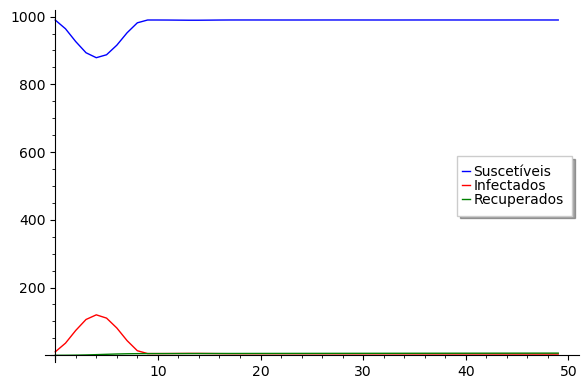

In [21]:
# Definindo as constantes
num_steps = 50 # tempo total
dt = 1 # tamanho do passo

T1 = 23.2  # Temperatura média na ausência de sazonalidade (˚C)
T2 = 0.07  # Amplitude da variabilidade sazonal na temperatura
omega1 = 0.67  # Frequência angular das oscilações sazonais na temperatura (meses^–1)
phi1 = 1.53  # "Phase lag" da variabilidade da temperatura (defasagem de fase)
R1 = 85.9  # Precipitação mensal média na ausência de sazonalidade (mm)
R2 = 0.98  # Amplitude da variabilidade sazonal na precipitação
omega2 = 0.65  # Frequência angular das oscilações sazonais na precipitação (meses^–1)
phi2 = 1.99  # "Phase lag" da variabilidade da precipitação (defasagem de fase)



B_E = 200 # número de ovos coolocadas por adulto por oviposição
p_E = 0.9 # probabilidade de sobrevivência dos ovos
p_L = 0.25 # probabilidade de sobrevivência das larvas
p_P = 0.75 # probabilidade de sobrevivência dos pupas
tau_E = 1 # duração da fase de desenvolvimento dos ovos
tau_P = 1  # duração da fase de desenvolvimento das pupas
c1 = 0.00554
c2 = -0.06737

D1 = 36.5
b1 = 0.04
A = -0.03
B = 1.31
C = -4.4
b2 = 0.09
tau_H = 10
DD = 111
Tmin = 16
gamma = 1/120

#tau_L = 2  # Valor arbitrário, por favor substitua com o valor ou função apropriado

mu = 0.02  # taxa de mortalidade de mosquitos
#ab1 = 0.2  # proporção de mordidas de mosquitos em humanos suscetíveis que resultam em infecção
N = 1000  # número total de humanos
M = 10000  # número total de mosquitos
I_M0 = M  # número inicial de mosquitos infectados
I_H0 = 10  # número inicial de humanos infectados
S_H0 = N - I_H0  # número inicial de pessoas suscetíveis

# Definindo as listas
S_H = [S_H0]
I_H = [I_H0]
R_H = [0]
times = [0]

# Funções de temperatura e chuva
def T(t):
    return T1 * (1 + T2 * cos(omega1 * t - phi1))

def R(t):
    return R1 * (1 + R2 * cos(omega2 * t - phi2))

def tau_L(T):
    return 1 / (c1 * T + c2)

def p(T):
    return np.exp(-1 / (A*T**2 + B*T + C))

def tau_M(T):
    return DD / (T - Tmin)

# Definindo a função de sobrevivência do mosquito
def l(tau_M, T):  
    p_T = p(T)
    return p_T**tau_M

# Simulando as equações diferenciais
for t in range(1, num_steps):
    # Atualize a temperatura e a chuva
    T_curr = T(t * dt)
    R_curr = R(t * dt)

    # Calcular a taxa de mordida e probabilidade de transmissão
    a = (T_curr - T1) / D1
    b = B_E * p_E * p_L * p_P / (tau_E + tau_L(T_curr) + tau_P)

    if t < tau_H:
        dS_H = -a * b2 * (I_M0 / N) * S_H[-1]
        dI_H = a * b2 * (I_M0 / N) * S_H[-1] - gamma * I_H[-1]
    else:
        dS_H = -a * b2 * (I_H[t - tau_H] / N) * S_H[t - tau_H]
        dI_H = a * b2 * (I_H[t - tau_H] / N) * S_H[t - tau_H] - gamma * I_H[-1]
    dR_H = gamma * I_H[-1]

    # Atualize as populações
    S_H.append(S_H[-1] + dt * dS_H)
    I_H.append(I_H[-1] + dt * dI_H)
    R_H.append(R_H[-1] + dt * dR_H)
    times.append(t * dt)

# Calculando R_0
#R_0 = (M * a**2 * ab1 * b2 * l(DD / (T1 - Tmin))) / (gamma * mu * N)
#print(f"R_0: {R_0}")

def calculate_R0(M, a, b1, b2, T, gamma, mu, N):
    tau_M_T = tau_M(T)
    l_tau_M = l(tau_M_T, T)  
    R_0 = (M * a**2 * b1 * b2 * l_tau_M) / (gamma * mu * N)
    return R_0

R_0 = calculate_R0(M, a, b1, b2, T1, gamma, mu, N)
print(f"R_0: {R_0}")

# Calcular prevalências de equilíbrio
I_M_star = M * (R_0 - 1) / ((R_0 / l(DD / (T1 - Tmin), T1)) + (a * b2 * M / (gamma * N)))
I_H_star = N * (R_0 - 1) / (R_0 + (a * b1 / mu))

print(f"Prevalência de equilíbrio para mosquitos: {I_M_star}")
print(f"Prevalência de equilíbrio para humanos: {I_H_star}")

times = [i*dt for i in range(num_steps)]

# Criar os gráficos
p1 = line(zip(times, S_H), color='blue', legend_label='Suscetíveis')
p2 = line(zip(times, I_H), color='red', legend_label='Infectados')
p3 = line(zip(times, R_H), color='green', legend_label='Recuperados')

# Combinar os gráficos e mostrar o resultado
(p1 + p2 + p3).show(xmin=0, xmax=num_steps*dt, ymin=0, ymax=N)

R_0: 0.0142956070634299
Prevalência de equilíbrio para mosquitos: 2311.7241175510467
Prevalência de equilíbrio para humanos: 656615.2053779738


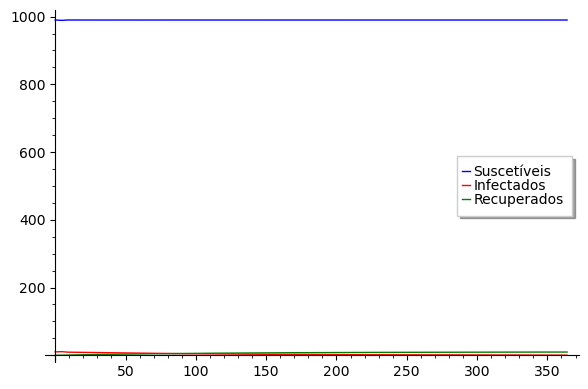

R_0: 0.008760989846527595
Prevalência de equilíbrio para mosquitos: 4496.273539399826
Prevalência de equilíbrio para humanos: 266470.5504993349


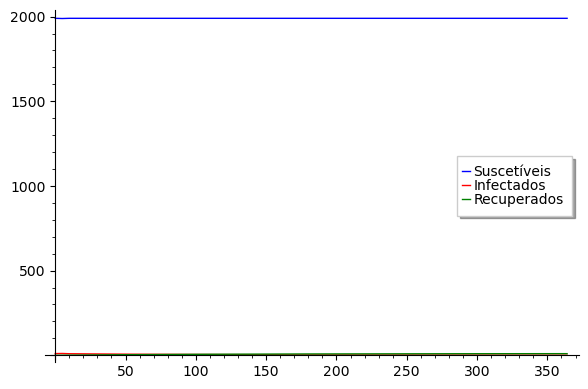

In [23]:
def run_simulation(num_steps=365, dt=1, T1=23.2, T2=0.07, omega1=0.67, phi1=1.53, R1=85.9, R2=0.98, omega2=0.65, phi2=1.99,
                   B_E=200, p_E=0.9, p_L=0.25, p_P=0.75, tau_E=1, tau_P=1, c1=0.00554, c2=-0.06737,
                   D1=36.5, b1=0.04, A=-0.03, B=1.31, C=-4.4, b2=0.09, tau_H=10, DD=111, Tmin=16, gamma=1/120,
                   ab1=0.2, N=1000, M=10000, I_M0=None, I_H0=10):
    # Definindo as constantes
    if I_M0 is None:
        I_M0 = M / 100

    S_H0 = N - I_H0

    # Funções de temperatura e chuva
    def T(t):
        return T1 * (1 + T2 * cos(omega1 * t - phi1))

    def R(t):
        return R1 * (1 + R2 * cos(omega2 * t - phi2))

    def tau_L(T):
        return 1 / (c1 * T + c2)

    def p(T):
        return np.exp(-1 / (A*T**2 + B*T + C))

    def tau_M(T):
        return DD / (T - Tmin)

    # Definindo a função de sobrevivência do mosquito
    def l(tau_M, T):  
        p_T = p(T)
        return p_T**tau_M

    # Definindo a função de mortalidade do mosquito
    def mu(T):
        return -log(p(T))

    # Simulando as equações diferenciais
    S_H = [S_H0]
    I_H = [I_H0]
    R_H = [0]
    times = [0]

    for t in range(1, num_steps):
        # Atualize a temperatura e a chuva
        T_curr = T(t * dt)
        R_curr = R(t * dt)

        # Calcular a taxa de mordida e probabilidade de transmissão
        a = (T_curr - T1) / D1
        b = B_E * p_E * p_L * p_P / (tau_E + tau_L(T_curr) + tau_P)

        if t < tau_H:
            dS_H = -a * b2 * (I_M0 / N) * S_H[-1]
            dI_H = a * b2 * (I_M0 / N) * S_H[-1] - gamma * I_H[-1]
        else:
            dS_H = -a * b2 * (I_H[t - tau_H] / N) * S_H[t - tau_H]
            dI_H = a * b2 * (I_H[t - tau_H] / N) * S_H[t - tau_H] - gamma * I_H[-1]
        dR_H = gamma * I_H[-1]

        # Atualize as populações
        S_H.append(S_H[-1] + dt * dS_H)
        I_H.append(I_H[-1] + dt * dI_H)
        R_H.append(R_H[-1] + dt * dR_H)
        times.append(t * dt)

    # Calculando R_0
    def calculate_R0(M, a, b1, b2, T, gamma, mu, N):
        tau_M_T = tau_M(T)
        l_tau_M = l(tau_M_T, T)  # Lembre-se de passar T para a função l
        R_0 = (M * a**2 * b1 * b2 * l_tau_M) / (gamma * mu(T) * N)
        return R_0

    R_0 = calculate_R0(M, a, b1, b2, T1, gamma, mu, N)
    print(f"R_0: {R_0}")

    # Calcular prevalências de equilíbrio
    I_M_star = M * (R_0 - 1) / ((R_0 / l(DD / (T1 - Tmin), T1)) + (a * b2 * M / (gamma * N)))
    I_H_star = N * (R_0 - 1) / (R_0 + (a * b1 / mu(T1)))

    print(f"Prevalência de equilíbrio para mosquitos: {I_M_star}")
    print(f"Prevalência de equilíbrio para humanos: {I_H_star}")

    times = [i*dt for i in range(num_steps)]

    # Criar os gráficos
    p1 = line(zip(times, S_H), color='blue', legend_label='Suscetíveis')
    p2 = line(zip(times, I_H), color='red', legend_label='Infectados')
    p3 = line(zip(times, R_H), color='green', legend_label='Recuperados')

    # Combinar os gráficos e mostrar o resultado
    (p1 + p2 + p3).show(xmin=0, xmax=num_steps*dt, ymin=0, ymax=N)

# Executar a simulação com os parâmetros padrão
run_simulation()

# Executar a simulação com diferentes parâmetros
run_simulation(T1=24, N=2000)